In [1]:
%pushd ..

/Users/lukakarginov/lineage-growth


['~/lineage-growth/notebooks']

In [2]:
from lineage.LineageTree import LineageTree
from lineage.tHMM import tHMM
from lineage.states.StateDistributionGamma import StateDistribution
import numpy as np

In [3]:
bern_p0 = 0.9
gamma_a0 = 10
gamma_scale0 = 1

bern_p1 = 0.5
gamma_a1 = 20
gamma_scale1 = 10

bern_p2 = 0.2
gamma_a2 = 50
gamma_scale2 = 10

state_obj0 = StateDistribution(bern_p0, gamma_a0, gamma_scale0)
state_obj1 = StateDistribution(bern_p1, gamma_a1, gamma_scale1)
state_obj2 = StateDistribution(bern_p2, gamma_a2, gamma_scale2)

In [4]:
#2 States
pi = np.array([.6, .4])
T = np.array([[.9, .1],[.2, .8]])
E = [state_obj0, state_obj1]

In [5]:
# 3 States
pi = np.array([.5, .3, .2])
T = np.array([[.8, .1, .1],
             [.1, .8, .1],
             [.1, .1, .8]])
E = [state_obj0, state_obj1, state_obj2]

In [7]:
lineages = []
for i in range(10):
    lineages.append([LineageTree.init_from_parameters(pi, T, E, 2**8-1)])

In [9]:
lineages

[[
   Generation: 1, State: 1, Observation: [0, 254.95174038652604, 1]
   Generation: 2, State: 1, Observation: [1, 189.0809393855602, 1]
   Generation: 2, State: 1, Observation: [1, 144.65286507446723, 1]
   Generation: 3, State: 0, Observation: [1, 11.816948720414434, 1]
   Generation: 3, State: 1, Observation: [1, 220.38264877008746, 1]
   Generation: 3, State: 1, Observation: [0, 236.4680832596301, 1]
   Generation: 3, State: 1, Observation: [1, 289.08425910541433, 1]
   Generation: 4, State: 0, Observation: [1, 7.085856146465714, 1]
   Generation: 4, State: 0, Observation: [1, 8.525149045243168, 1]
   Generation: 4, State: 1, Observation: [1, 180.8493851285729, 1]
   Generation: 4, State: 1, Observation: [1, 162.17419858050135, 1]
   Generation: 4, State: 1, Observation: [1, 254.48894673148124, 1]
   Generation: 4, State: 1, Observation: [0, 148.4936373694448, 1]
   Generation: 4, State: 1, Observation: [1, 228.61638206005338, 1]
   Generation: 4, State: 1, Observation: [0, 199.53

In [42]:
from lineage.Analyze import run_Analyze_over
import matplotlib.pyplot as plt
from lineage.Analyze import Analyze

In [50]:
AICs = [[],[],[],[],[],[],[],[],[],[]]
for states in range(1,4):
    output = run_Analyze_over(lineages, states)
    for lineageNo in range(len(lineages)):  
        AIC, _ = output[lineageNo][0].get_AIC(output[lineageNo][2])
        AICs[lineageNo].append(AIC[0])

In [51]:
AICs

[[2776.624538066391, 1891.2539230318523, 1903.6439507108676],
 [3769.089562380062, 2276.389590055821, 2287.115044409807],
 [3827.1312803679134, 2319.2381923421435, 2331.9027505740864],
 [3408.427701284935, 2134.5734292404004, 2148.5372278110854],
 [3716.268026607588, 2302.0974612986274, 2310.246744857337],
 [3741.208512693089, 2245.199359596529, 2256.108054872521],
 [3108.806511159968, 2031.2265166317477, 2039.4093556967268],
 [3906.846123899594, 2410.686431279797, 2420.6920803453663],
 [3565.15108211276, 2203.774122803209, 2214.8531070446707],
 [3170.8756690506, 2057.9444667696366, 2065.184523514777]]

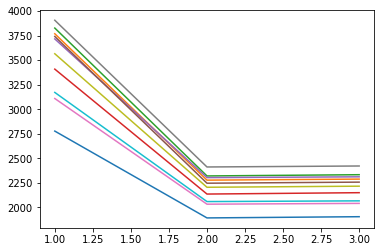

In [52]:
for curve in AICs:
    plt.plot(np.arange(1,4), curve)

In [55]:

# add 10 curves to compare each lineage separately
ls = []
for lineage in lineages:
    ls.append(lineage[0])
AICs = []
for i in range(3):
    tHMM, _, LL = Analyze(ls, i+1)
    AIC, _ = tHMM.get_AIC(LL)
    AICs.append((np.mean(AIC), np.std(AIC)))


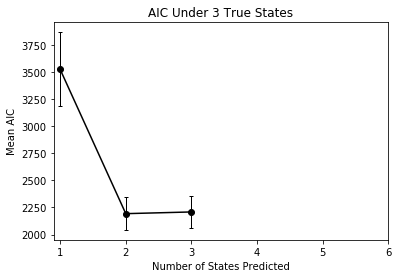

In [57]:
plt.errorbar(np.arange(1,4), list(zip(*AICs))[0],yerr = list(zip(*AICs))[1], fmt = 'ko-', elinewidth=1, capsize=2)

plt.ylabel("Mean AIC")
plt.xlabel("Number of States Predicted")
plt.xticks(np.arange(1,7))
plt.title('AIC Under 3 True States')
plt.savefig('/Users/lukakarginov/lineage-growth/notebooks/AIC 3 States.pdf')
plt.show()

In [78]:
list(zip(*AICs))[0]

(756.4505221998203,
 415.99091687621194,
 384.634750222909,
 404.478439980847,
 427.73414473290995)

In [1]:
tHMM, _, LL = Analyze(lineages, 3)

NameError: name 'Analyze' is not defined

In [2]:
from lineage.LineageInputOutput import import_Heiser

In [5]:
x = import_Heiser('/Users/lukakarginov/lineage-growth/lineage/data/heiser_data/Synth_data.xlsx')

In [6]:
x

[[
   Generation: 2, State: None, Observation: [1, 0, 10.0, 10, 1, 1], 
   Generation: 2, State: None, Observation: [1, nan, 20.0, 105.0, 1, 0], 
   Generation: 1, State: None, Observation: [1, 1, 10, 10.0, 1, 1]], [
   Generation: 2, State: None, Observation: [0, nan, 60.0, nan, 1, nan], 
   Generation: 2, State: None, Observation: [1, 0, 10.0, 10, 1, 1], 
   Generation: 1, State: None, Observation: [1, 1, 10, 10.0, 1, 1]], [
   Generation: 3, State: None, Observation: [1, nan, 30.0, 25.0, 1, 0], 
   Generation: 3, State: None, Observation: [1, nan, 25.0, 30.0, 1, 0], 
   Generation: 2, State: None, Observation: [1, 1, 30.0, 30.0, 1, 1], 
   Generation: 2, State: None, Observation: [1, 0, 10.0, 80, 1, 1], 
   Generation: 1, State: None, Observation: [1, 1, nan, 30.0, nan, 0]], [
   Generation: 1, State: None, Observation: [1, nan, nan, 145.0, nan, 0]]]

In [10]:
print(2 if x else 1)

2


In [9]:
x = True